In [981]:
import pandas as pd
import numpy as np

In [982]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Tiền Xử Lí Dữ Liệu

In [983]:
df.isnull().sum() #Kiểm tra dữ liệu có null ko

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [984]:
#Lấy số dòng số cột của Dataset
df.shape

(768, 9)

In [985]:
#Xem thông tin về kiểu dữ liệu, dung lượng lưu trữ
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [986]:
#Thống kê dữ liệu cho các cột số
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Trực Quan Hóa Dữ Liệu

In [987]:
#Thư viện biểu diễn đồ thị
import matplotlib.pyplot as plt 
import seaborn as sns

####  Histogram (Biểu đồ tần suất)

<Axes: xlabel='Glucose', ylabel='Count'>

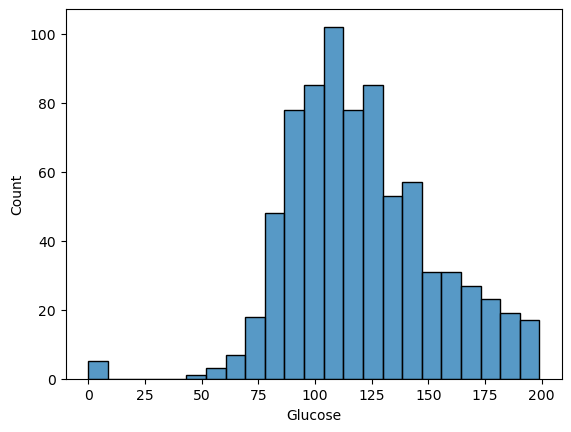

In [988]:
sns.histplot(x="Glucose", data=df)

####   Scatter Plot (Biểu đồ phân tán)

<Axes: xlabel='BMI', ylabel='Age'>

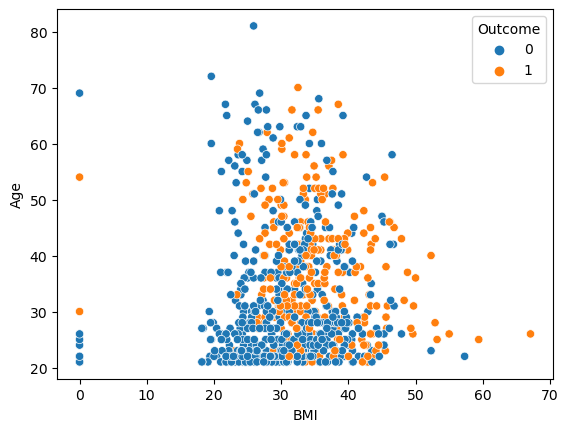

In [989]:
#Chỉ số BMI cao và tuổi có thể là rủi ro của bệnh tiểu đường
sns.scatterplot(x="BMI", y="Age", data=df, hue = "Outcome")

<Axes: xlabel='Glucose', ylabel='Insulin'>

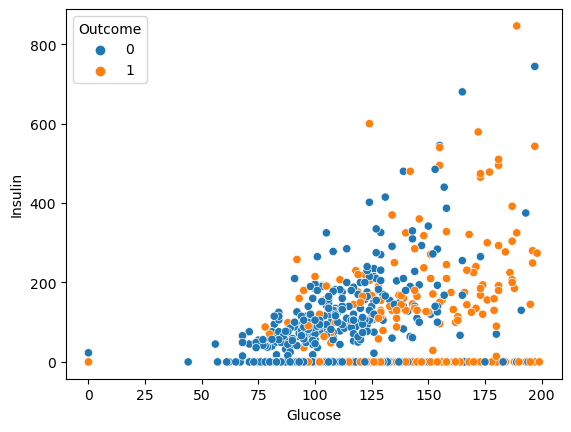

In [990]:
#Glucose cao và Insulin thấp có thể là dấu hiệu của bệnh tiểu đường
sns.scatterplot(x="Glucose", y="Insulin", data=df, hue = "Outcome")

#### Biểu đồ hộp (box plot)

In [991]:
#So sánh chỉ số khối cơ thể giữa hai nhóm bệnh nhân. Bệnh nhân tiểu đường có BMI cao hơn
import plotly.express as px
fig = px.box(df, x = "Outcome", y = "BMI", color = "Outcome")
fig.show()

In [992]:
#So sánh mức glucose giữa hai nhóm bệnh nhân (Outcome = 0 và Outcome = 1). Bệnh nhân mắc tiểu đường có xu hướng có mức glucose cao hơn.
fig = px.box(df, x = "Outcome", y = "Glucose", color = "Outcome")
fig.show()

#### Biểu đồ cột (bar chart)

<Axes: xlabel='Age', ylabel='Outcome'>

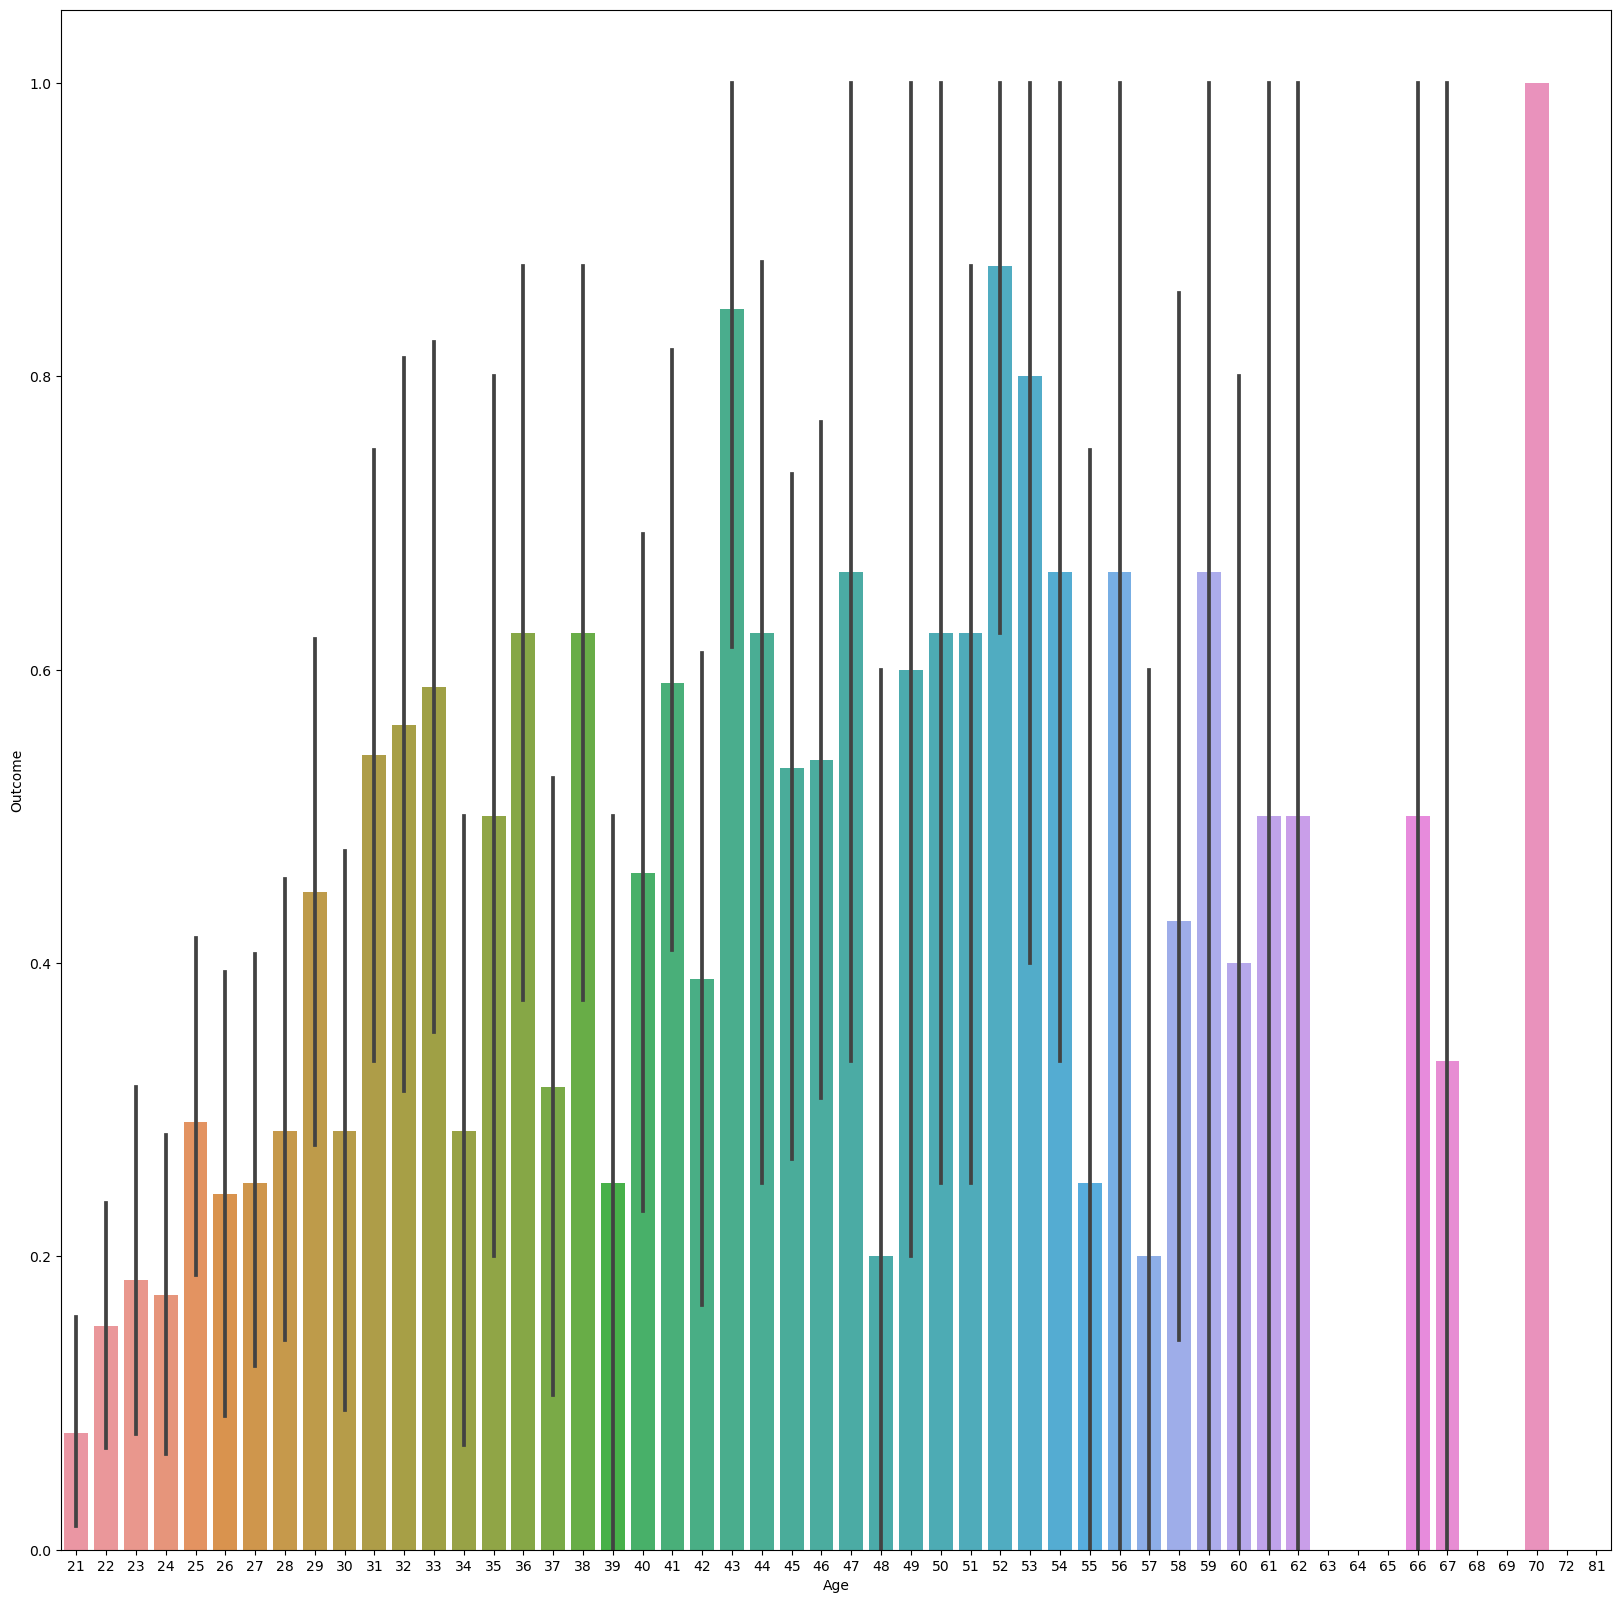

In [993]:
#So sánh số lượng người bệnh tiểu đường và không tiểu đường trong các nhóm tuổi khác nhau.
plt.figure(figsize=(20,20))
sns.barplot(x='Age', y='Outcome', data=df)

##### Biểu đồ cột (bar chart) so sánh số lượng người mắc bệnh tiểu đường (Outcome = 1) và không mắc bệnh tiểu đường (Outcome = 0)

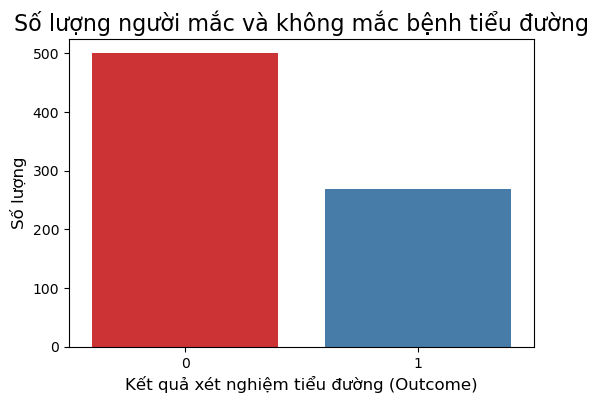

In [994]:
# Tạo biểu đồ cột
plt.figure(figsize= (6, 4))
sns.countplot(x='Outcome', data=df, palette='Set1')

# Thêm tiêu đề và nhãn
plt.title('Số lượng người mắc và không mắc bệnh tiểu đường', fontsize=16)
plt.xlabel('Kết quả xét nghiệm tiểu đường (Outcome)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị biểu đồ
plt.show()

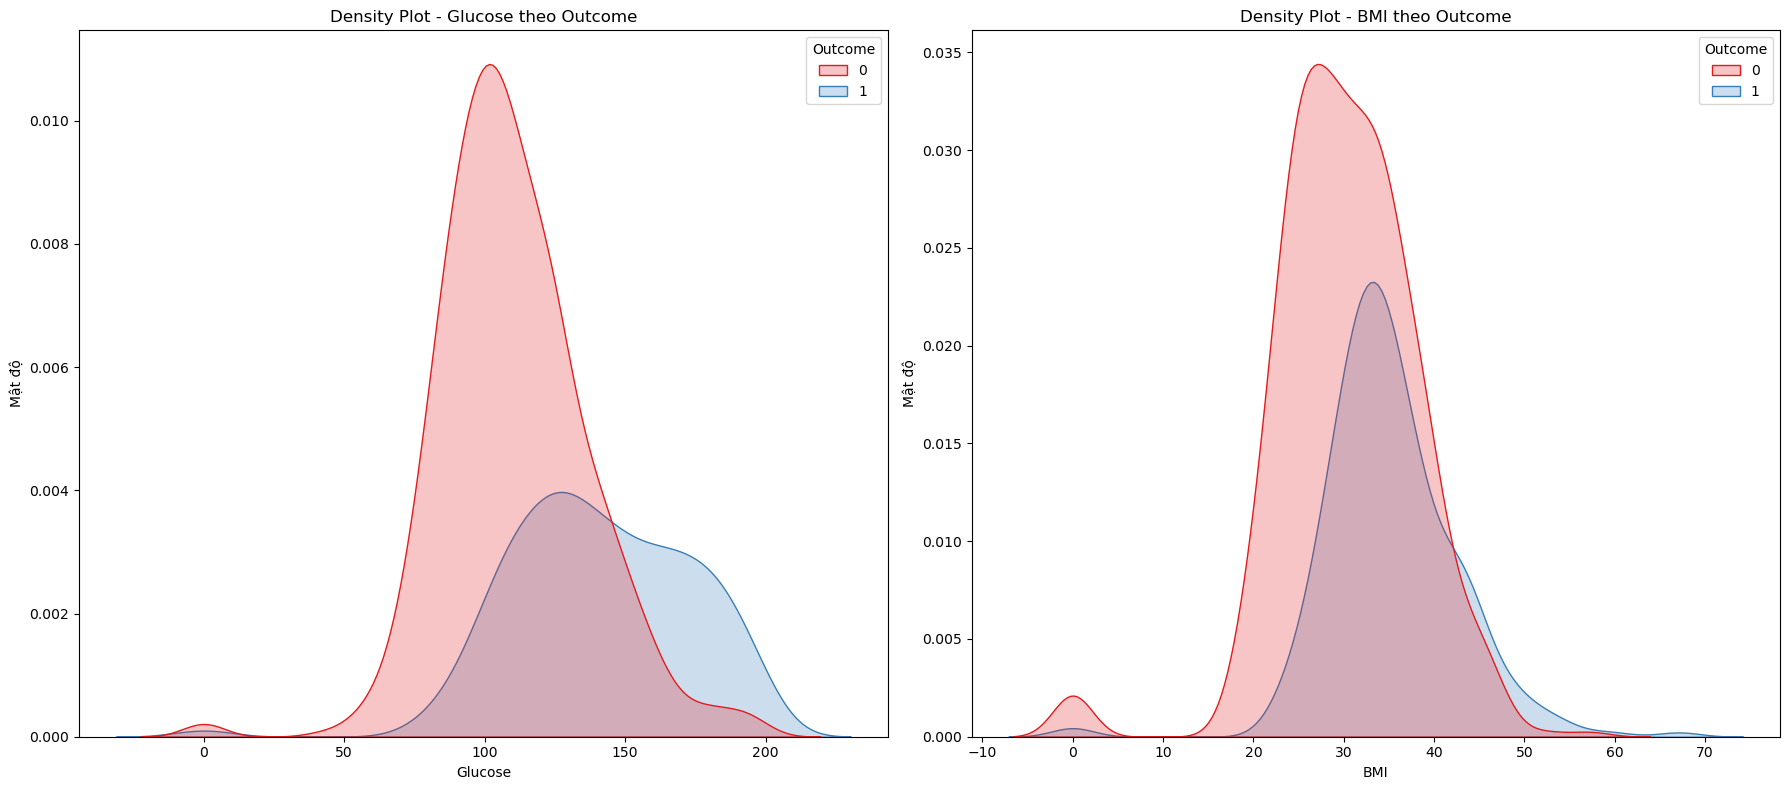

In [995]:
# Tạo figure với 2 biểu đồ mật độ
plt.figure(figsize=(18, 8))

# Biểu đồ mật độ cho Glucose
# Sự phân bố mức glucose cho cả hai nhóm bệnh nhân, phát hiện sự khác biệt trong mức glucose giữa bệnh nhân có và không mắc bệnh tiểu đường.
plt.subplot(1, 2, 1)  # Biểu đồ bên trái
sns.kdeplot(data=df, x='Glucose', hue='Outcome', fill=True, palette='Set1')
plt.title('Density Plot - Glucose theo Outcome')
plt.xlabel('Glucose')
plt.ylabel('Mật độ')

# Biểu đồ mật độ cho BMI
# So sánh phân bố BMI giữa hai nhóm bệnh nhân.
plt.subplot(1, 2, 2)  # Biểu đồ bên phải
sns.kdeplot(data=df, x='BMI', hue='Outcome', fill=True, palette='Set1')
plt.title('Density Plot - BMI theo Outcome')
plt.xlabel('BMI')
plt.ylabel('Mật độ')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lấn
plt.show()

##### Xử Lý Dữ Liệu(Data Processing)

In [996]:
#Với dữ liệu có chứa số 0 htay thế bằng NaN:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [997]:
df.isnull().sum() #Kiểm tra giá trị null 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [998]:
#Xử lí giá trị chứa null:
df["Glucose"].fillna(df["Glucose"].mean(), inplace= True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace= True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace= True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace= True)
df["BMI"].fillna(df["BMI"].mean(), inplace= True)

#Làm tròn sau 1 số thập phân
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].round(1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.5,26.6,0.351,31,0
2,8,183.0,64.0,29.2,155.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [999]:
df.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.8,3.4,0.0,1.0,3.0,6.0,17.0
Glucose,768.0,121.7,30.4,44.0,99.8,117.0,140.2,199.0
BloodPressure,768.0,72.4,12.1,24.0,64.0,72.2,80.0,122.0
SkinThickness,768.0,29.2,8.8,7.0,25.0,29.2,32.0,99.0
Insulin,768.0,155.5,85.0,14.0,121.5,155.5,155.5,846.0
BMI,768.0,32.5,6.9,18.2,27.5,32.4,36.6,67.1
DiabetesPedigreeFunction,768.0,0.5,0.3,0.1,0.2,0.4,0.6,2.4
Age,768.0,33.2,11.8,21.0,24.0,29.0,41.0,81.0
Outcome,768.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


In [1000]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Modelling

In [1001]:
from sklearn.model_selection import train_test_split
from sklearn import tree, neighbors, naive_bayes, ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [1002]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
df_scaled = sc.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

In [1003]:
X = df_scaled.iloc[:,[1, 4, 5, 7]].values
y = df_scaled.iloc[:, 8].values

In [1004]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42,stratify = df['Outcome'])

##### KNN

In [1005]:
knn = neighbors.KNeighborsClassifier(n_neighbors=29, metric='minkowski', p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=29)

In [1006]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 4), (231, 4), (537,), (231,))

In [1007]:
y_pred = knn.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1.

In [1008]:
knn_score = round(accuracy_score(y_test, y_pred) * 100, 2) 
print(f"The accuracy score KNN: {knn_score}%")
print('Precision: %.3f' % precision_score(y_pred, y_test))
print('Reacll: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score KNN: 77.92%
Precision: 0.593
Reacll: 0.593
F1 Score: 0.653
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       150
         1.0       0.73      0.59      0.65        81

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231



###### Confusion Matrix

In [1009]:
print(confusion_matrix(y_test, y_pred))

[[132  18]
 [ 33  48]]


#### Naive Bayes

In [1010]:
gnb = naive_bayes.GaussianNB(var_smoothing=1e-8)  # Tăng hằng số để tránh các vấn đề về phương sai nhỏ
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)

In [1011]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

In [1012]:
gnb_score = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"The accuracy score GNB: {gnb_score}%")
print('Precision: %.3f' % precision_score(y_pred, y_test))
print('Reacll: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score GNB: 73.16%
Precision: 0.519
Reacll: 0.519
F1 Score: 0.575
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.80       150
         1.0       0.65      0.52      0.58        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



###### Confusion Matrix

In [1013]:
confusion_matrix(y_test, y_pred)

array([[127,  23],
       [ 39,  42]], dtype=int64)

#### Decision Trees

In [1014]:
#criterion='gini' tiêu chí để đo của các nhánh tại mỗi nút quyết định.
#ccp_alpha = 0: Không thực hiện cắt tỉa. ccp_alpha > 0: Cắt tỉa một phần của cây quyết định dựa trên chi phí của các nút.
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=5,ccp_alpha=0.01)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

In [1015]:
y_pred = dt.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

In [1016]:
dt_score = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"The accuracy score Decision Trees: {dt_score}%")
print('Precision: %.3f' % precision_score(y_pred, y_test))
print('Reacll: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score Decision Trees: 72.73%
Precision: 0.444
Reacll: 0.444
F1 Score: 0.533
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       150
         1.0       0.67      0.44      0.53        81

    accuracy                           0.73       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.72      0.73      0.71       231



###### Confusion Matrix

In [1017]:
confusion_matrix(y_test, y_pred)

array([[132,  18],
       [ 45,  36]], dtype=int64)

#### Random forest

In [1018]:
#n_estimators: Số lượng cây trong rừng, max_depth: Độ sâu tối đa của cây, min_samples_leaf: Số lượng mẫu tối thiểu cần có để là một nút lá  
rf = ensemble.RandomForestClassifier(max_depth=10, n_estimators=100, min_samples_leaf=10) 
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10)

In [1019]:
y_pred = rf.predict(X_test)
y_pred

array([0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1.

In [1020]:
rf_score = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"The accuracy score Random forest: {rf_score}%")
print('Precision: %.3f' % precision_score(y_pred, y_test))
print('Reacll: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score Random forest: 73.59%
Precision: 0.568
Reacll: 0.568
F1 Score: 0.601
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       150
         1.0       0.64      0.57      0.60        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



###### Confusion Matrix

In [1021]:
confusion_matrix(y_test, y_pred)

array([[124,  26],
       [ 35,  46]], dtype=int64)

# ***Graph for Different Algo***

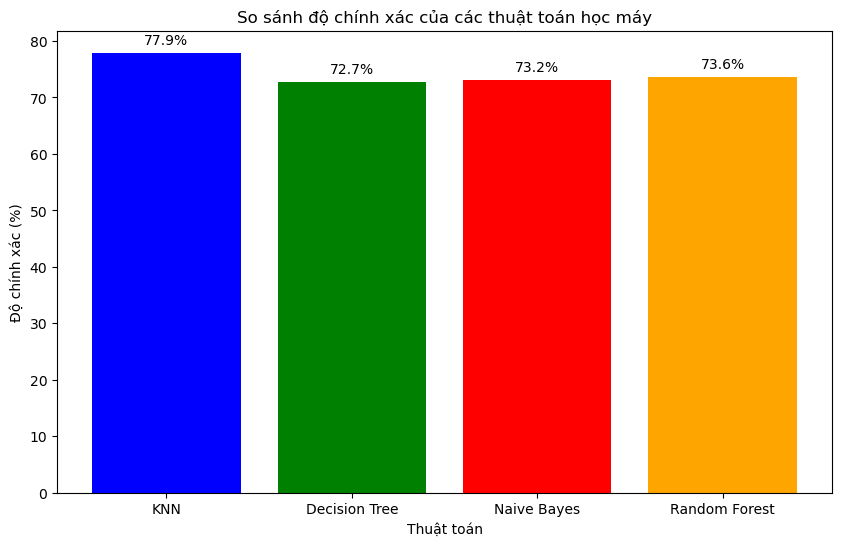

In [1028]:
accuracy_scores = [knn_score, dt_score, gnb_score, rf_score]
algorithms = ['KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Kiểm tra kiểu dữ liệu và chuyển đổi nếu cần
accuracy_scores = [float(score) for score in accuracy_scores]

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'red', 'orange'])

# Thêm tiêu đề và nhãn
plt.title('So sánh độ chính xác của các thuật toán học máy')
plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác (%)')

# Ghi số phần trăm trên các cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()